## Global Human Trafficking Data Analysis 

This data analysis was done using the dataset from Kaggle (https://www.kaggle.com/andrewmvd/global-human-trafficking). This dataset is taken from the Counter-Trafficking Data Collaborative (CTDC). This dataset contains information on 48.8k victims of human trafficking, including the reason, means of control, origin and destination, as well as other variables. Missingness is displayed as -99 in this dataset.

The objective of this dataset : 
1. Predict time series of human trafficking.
2. Explore demographics, means of control and other variables associated with human trafficking.

Some great resources I used to build my code:
1. https://www.kaggle.com/jeffreybraun/human-trafficking-starter-analysis
2. https://www.kaggle.com/viktorpolevoi/global-human-trafficking-eda

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3
import os

In [29]:
data = pd.read_csv("human_trafficking.csv")
data.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
1,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
2,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
3,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
4,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1


In [30]:
data.columns

Index(['yearOfRegistration', 'Datasource', 'gender', 'ageBroad',
       'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry',
       'citizenship', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'meansOfControlConcatenated',
       'isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemova

## Questions 

Based on the above data, I came up with some questions 

1. What is the primary demographic of victims being trafficked ?
2. How are these victims being trafficked ? 
3. Who is the enabler for these trafficking events ?
4. What happens to the victims once they are trafficked ?
5. What are the identifiable trends in the dataset over a period of time ?

## Data Cleaning

Before we proceed the data needs to be cleaned first. Since the missing data is indicated using "-99" it needs to be replaced into a variable like "NaN" which is readable for the pandas library. 
After this the percentage of missing values can be considered in each column so that we can assess whether we need to drop these columns or not. 

In [31]:
data.replace(-99, np.nan, inplace=True)
data.replace("-99", np.nan, inplace=True)

In [32]:
data.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
1,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
2,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
3,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
4,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0


In [33]:
#Percentage of missing values in each column
missing = data.columns[np.sum(data.isna())/data.shape[0] > 0.75]
len(missing)

28

Even if 28 columns of the dataframe have more than 75% this data is useful for our analysis. Which means we have to remove the missing values, or impute them in some way. 

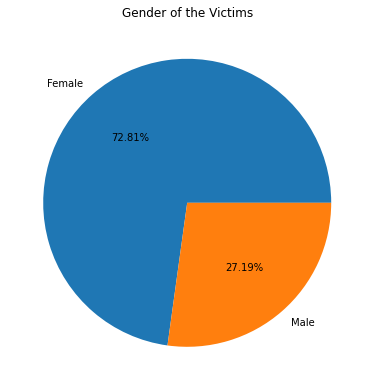

In [136]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
counts = dict(data['gender'].value_counts())
ax.pie(counts.values(), labels = counts.keys(),autopct='%1.2f%%')
plt.title('Gender of the Victims')
plt.show()

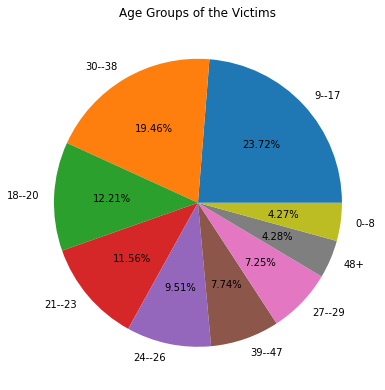

In [169]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
age_counts = dict(data['ageBroad'].value_counts())
ax.pie(age_counts.values(), labels = age_counts.keys(),autopct='%1.2f%%')
plt.title('Age Groups of the Victims')
plt.show()

In [167]:
fig = px.sunburst(data[data['majorityStatus'].notna()], path=['gender', 'majorityStatus', 'ageBroad'], color='majorityStatus',
                  title='Gender, Age and Majority Status Trafficking Victims')
fig.update_layout(width=600, height=600)
fig.show()


### Points to note 

1. Around 72% of the victims were female. 
2. The number of female victims across all age groups seems to be higher than the number of male victims. 
3. The two most common age groups of the victims were 9-17 (23.72%) and 30-38 (19.46%). 
4. More number of victims identified as 'adults' in their respective gender categories. 

Now, let us move on the find out more about the citizenship status of the victims.